<a href="https://colab.research.google.com/github/AliefGr/Deep-Learning-1/blob/main/Membuat_dan_Melatih_Model_untuk_Klasifikasi_Banyak_Kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seperti biasa, langkah pertama kita perlu melakukan impor library yang dibutuhkan untuk latihan multikelas ini.

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Setelah semuanya siap, Anda dapat menambahkan code cell pertama pada notebook yang telah dibuka. Dengan menggunakan pandas untuk kita dapat merubah dataset menjadi sebuah dataframe. Untuk melakukannya, gunakan fungsi read_csv().

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1roJ83AbgzDcvRr0Gwud0BmdUQx-oSG-w')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dapat Anda lihat pada dataframe di atas bahwa terdapat kolom id yang tidak ada hubungan dengan label sehingga kita perlu membuang kolom tersebut. Untuk membuang kolom dari dataframe, kita dapat menggunakan fungsi drop(). Fungsi ini berguna untuk menghapus kolom sesuai dengan kebutuhan model.

In [3]:
df = df.drop(columns='Id')

Masih ingatkan kalau sebuah model neural network tidak bisa memproses string sebagai kategori? Hal tersebut menyebabkan kita harus mengubah nilai pada kolom Species menjadi numerik terlebih dahulu agar bisa diproses oleh model neural network. Sebelumnya kita sudah mempelajari penggunaan LabelEncoder dari SKLearn dan transformasi secara manual, tentunya sangat membosankan jika menggunakan metode yang sama terus, bukan?

Karena pada kasus ini label kita merupakan data kategorikal mari kita pelajari salah satu metode transformasi lainnya, yaitu one hot encoding menggunakan fungsi get_dummies(). Fungsi ini memungkinkan mengubah setiap variabel dalam menjadi angka sebanyak nilai yang berbeda. Kolom pada output masing-masing diberi nama sesuai dengan nilai. Jika inputnya berupa DataFrame, nama variabel asli akan ditambahkan ke nilai tersebut sebagai nama kolom.

In [4]:
category = pd.get_dummies(df.Species, dtype=int)
category


,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Kemudian, kita perlu menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena sudah ada variabel baru dan tidak akan terpakai lagi.

In [5]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Setelah selesai mengolah dataframe, kita harus melakukan konversi dataframe tersebut menjadi numpy array dengan fungsi values dari dataframe.

In [6]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

Nah, pada tahap berikutnya, kita perlu memisahkan atribut dan label agar model neural network dapat mempelajari pola dari berbagai data dan hubungannya dengan label yang telah ditentukan.
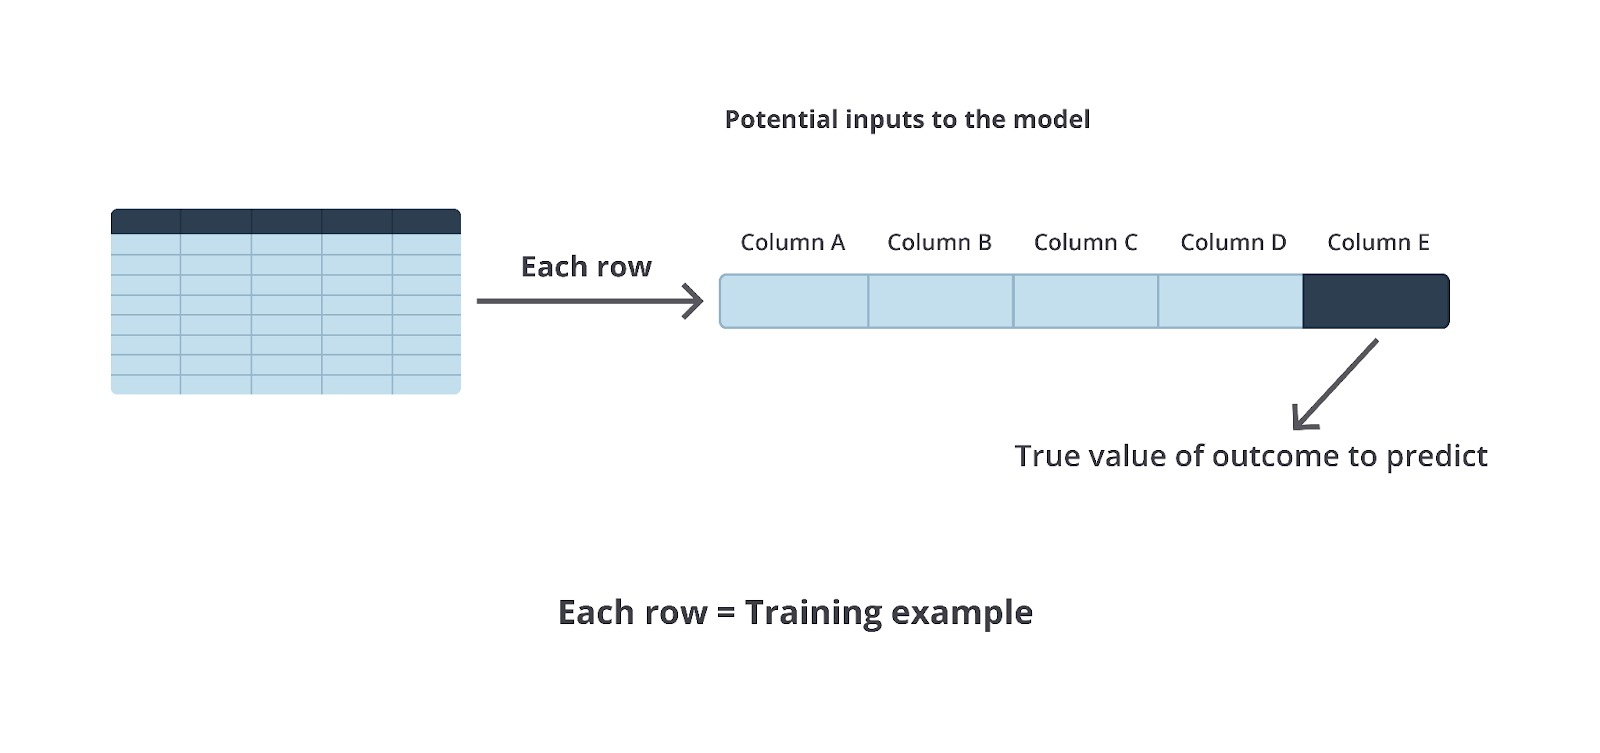

Untuk memisahkan atribut dengan label, kita perlu menentukan terlebih dahulu variabel independen dan variabel dependennya. Pada kasus ini, variabel independen mencakup SepalLengthCm, SepalWidthCm, PetalLengthCm, dan PetalWidthCm. Lalu, variabel dependen atau label mencakup Iris-setosa, Iris-versicolor, dan Iris-virginica. Untuk melakukan pemisahan tersebut, kita dapat menggunakan kode berikut.

In [7]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

Tahap berikutnya yang cukup krusial dan sering terlupakan adalah normalisasi. Kita perlu melakukan normalisasi agar data dapat dipelajari dengan baik oleh model neural network. Pada modul sebelumnya, kita telah berhasil melakukan normalisasi pada dataset buah-buahan. Yup, hal yang sama perlu kita lakukan pada data yang ada pada kasus ini.

In [8]:
# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Sesudah itu lakukan pembagian data menjadi data latih dan data uji. Tidak ada acuan baku untuk pembagian ukuran dataset ini. Tujuan dari pembagian dataset ini untuk membagi data menjadi dua bagian seperti namanya. Biasanya, data dipisahkan menjadi dua bagian, satu bagian digunakan untuk mengevaluasi atau menguji data dan bagian lainnya untuk melatih model. Namun, terdapat metode lain seperti membagi menjadi tiga bagian menjadi data latih, data uji, dan data validasi. Biasanya teknik ini disebut dengan cross validation.

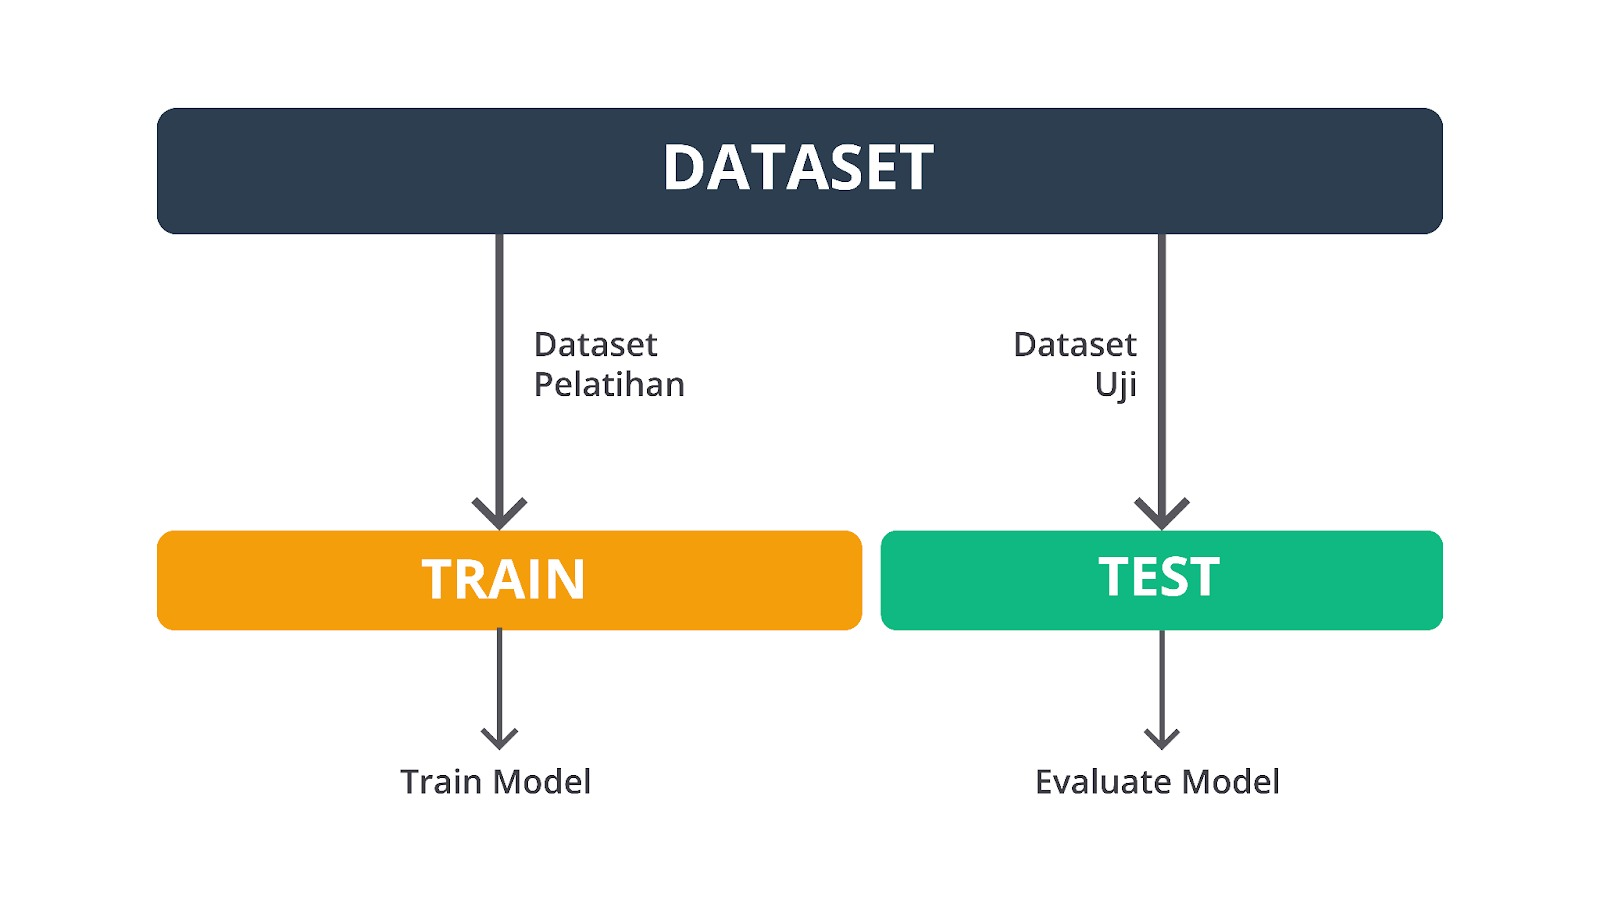

Kembali pada kasus yang sedang kita hadapi, lakukanlah pembagian data menjadi data latih dan data uji. Untuk ukuran data testing yang digunakan 30%, tentu Anda dapat bereksperimen menggunakan proporsi pembagian lainnya.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)


Untuk arsitektur model, kita kali ini menggunakan 3 buah layer. Activation function yang digunakan pada layer terakhir dipilih softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas seperti ini. Jika penasaran terkait softmax lebih detail, silakan membaca kembali pada modul sebelumnya, ya.

In [10]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Lanjutkan dengan menentukan optimizer dan loss function dari model. Untuk masalah klasifikasi multi kelas, Anda dapat menggunakan loss ‘categorical_crossentropy’.

In [11]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

categorical_crossentropy adalah fungsi kerugian (loss function) yang sering digunakan dalam tugas klasifikasi multikelas di mana label targetnya adalah dalam bentuk one-hot encoding. Fungsi ini umumnya digunakan dalam kasus di mana output dari model adalah distribusi probabilitas untuk setiap kelas.

Tujuan dari categorical_crossentropy adalah untuk mengevaluasi seberapa baik model memprediksi distribusi probabilitas kelas yang benar. Dengan mengoptimalkan fungsi ini selama proses pelatihan menggunakan algoritma seperti Adam atau varian-modifikasi lainnya, model berusaha untuk membuat prediksi yang semakin mendekati distribusi probabilitas yang diharapkan.

Selain itu, categorical_crossentropy juga berguna karena memberikan umpan balik kepada model ketika ada perbedaan besar antara probabilitas prediksi dan probabilitas target, membantu model untuk mengoreksi diri dan meningkatkan performa klasifikasi multikelas.

Nah, pada latihan ini ada sedikit perubahan yang perlu kita pelajari lagi. Fungsi fit() sekarang kita tampung ke dalam objek hist (history). Untuk apa kita melakukan hal ini? Temukan jawabannya di materi berikutnya, ya.

Kode
Output
hist = model.fit(X_train, Y_train, epochs=100)
Sampai di sini, Anda sudah berhasil membuat model untuk menyelesaikan kasus multi kelas. Seperti pada gambar di atas, akurasi yang kita dapatkan kurang lebih 0.98 (98%), tetapi ini dapat berbeda setiap kali melatih model seperti yang telah kita bahas sebelumnya. Jadi jangan risau, ya.

Terakhir, kita perlu menguji akurasi prediksi dari model yang telah dibangun menggunakan data uji yang belum pernah dilihat.

In [12]:
model.evaluate(X_test, Y_test, batch_size=1)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2002 - loss: 1.1627


[1.1347193717956543, 0.3333333432674408]

Hasil evaluasi yang kita lakukan ternyata mendapatkan akurasi yang dapat diandalkan karena mencapai 0.95 (95%) yang berarti kita berhasil memprediksi 43 dari 45 data dengan benar. Wow, angka yang sangat baik, bukan?

Selamat, Anda telah berhasil membuat model neural network untuk menyelesaikan permasalahan binary maupun multi kelas sehingga ke depannya Anda sudah lebih siap untuk berkecimpung di dunia industri. Ini tentunya sebuah perjalanan yang sangat mengasyikkan, tetapi jangan berpuas diri terlebih dahulu karena selanjutnya kita akan mempelajari lebih dalam mengenai plot loss dan akurasi dari model yang telah dibangun.

Karena ada hujan maka tanah basah
Tanah sudah lama kena basahnya
Kali ini saatnya kita berpisah
Sampai jumpa di materi berikutnya.